## **Метод опорных векторов**
Метод опорных векторов (Support Vector Machines или просто SVM) — мощный и универсальный набор алгоритмов для работы с данными любой формы, применяемый не только для задач классификации и регрессии, но и также для выявления аномалий. В данной статье будут рассмотрены основные подходы к созданию SVM, принцип работы, а также реализации с нуля его наиболее популярных разновидностей.


### **Линейный случай SVM**
**В случае линейной классификации** основная идея SVM заключается в поиске гиперплоскости или линии, разделяющей классы наилучшим образом, а расположенные ближе всего к разделяющей гиперплоскости образцы называются *опорными векторами*. Лучшим разделением классов будет то, при котором максимизируется расстояние между опорными векторами и разделяющей гиперплоскостью. Это расстояние называется *зазором*. Здесь возможны 2 варианта:
- 1) **Классификация с жёстким зазором (hard margin)**, когда все обучающие образцы должны быть правильно классифицированы и находиться за пределами полосы разделения. Такой подход работает только в случае хорошей линейной разделимости данных и является довольно чувствительным к выбросам.
- 2) **Классификация с мягким зазором (soft margin)**, когда вводится допущение, что некоторые обучающие образцы могут нарушать условие правильной классификации или попадать в полосу разделения, но при этом вводится штраф за такие нарушения, пропорциональный параметру C (чем ниже данное значение, тем шире полоса и больше нарушений попадает в зазор). При таком подходе увеличивается обобщающая способность модели, что позволяет снизить риск переобучения.

Спрогнозированными классами будет линейная комбинация весов и тестовых признаков с использованием стратегии OVR (One-Versus-Rest) или OVA (One-Versus-All), а для минимизации используется функция потерь hinge:

$$min \rightarrow C \sum \limits_{i=1}^{n} max(0, 1 - y_i (w^TX + b))$$

В реализации scikit-learn к данной функции потерь ещё добавляется l1 или l2-регуляризация на выбор, а также имеется возможность использовать квадратичную функцию потерь с помощью параметра loss='squared_hinge'.

Стоит отметить, что задачи с жёстким и мягким зазором являются задачами выпуклой квадратичной оптимизации с линейными ограничениями и относятся к задачам квадратичного программирования, для решения которых существует множество различных готовых пакетов.

В данном случае используется готовая реализация на основе библиотеки Liblinear, но в ручной реализации ниже для более простого понимания будет использован градиентный спуск с одним улучшением: веса будут обновляться не на каждой итерации с учётом прогнозов всех образцов, а только с учётом прогнозов для каждого обучающего образца отдельно при условии, что размер отступа меньше 1, что получается из уравнения выше. Такой подход позволяет обеспечить сравнимую точность hinge loss без регуляризации с squared hinge loss с l2-регуляризацией в scikit-learn, а если использовать аналогичные параметры, то точность будет в целом немного выше, однако такое решение менее стабильно.

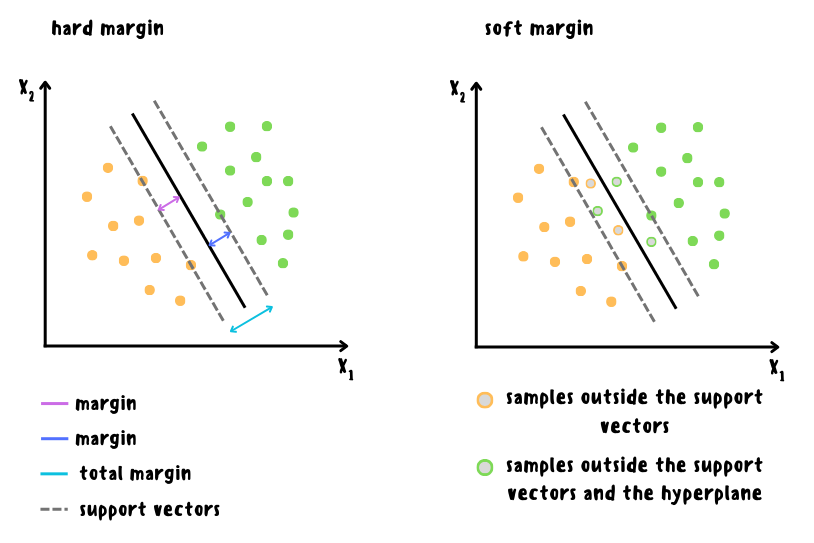

**В случае линейной регрессии** SVM пытается минимизировать расстояние между зазором и образцами, что лежат за его пределами, а добавление дополнительных обучающих образцов внутрь зазора не влияет на итоговый прогноз. Проще говоря, принцип такой же как и в обычной линейной регрессии, но вместо линии используется зазор, ширина которого контролируется параметром epsilon, а минимизируемая функция потерь называется epsilon-insensitive:

$$\min \rightarrow C \sum\limits_{i=1}^{n} \max(0, |y_i - (w^T \phi(x_i) + b)| - \varepsilon)$$

Как и в случае с классификацией, в реализации scikit-learn для регрессии SVM используется l1 или l2-регуляризация на выбор, а функция потерь также может быть квадратичной.

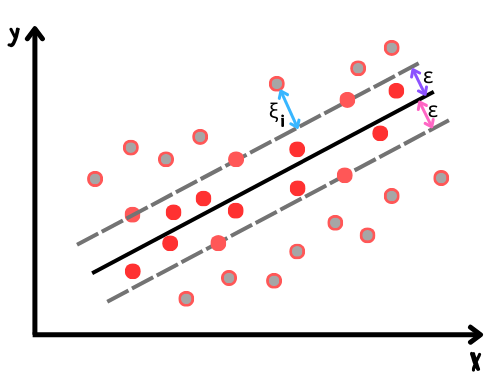

### **Нелинейный случай SVM**
**В случае нелинейной классификации** данные преобразуются в пространство более высокой размерности, где они становятся линейно разделимыми. Одним из самых простых способов является добавление полиномиальных признаков, однако в таком случае сильно увеличивается вычислительная сложность.

Более интересным и эффективным способом является использование *ядерного трюка* — это приём работы с данными в исходном пространстве, при котором скалярное произведение трансформированных векторов n-й степени заменяется на их произведение в степени n, что даёт аналогичный результат. Проще говоря, такой подход позволяет получить такие же результаты, как и в случае с добавлением большого количества полиномиальных признаков без их фактического добавления:

$$\phi(a)^T \cdot \phi(b) = (a^T \cdot b)^n$$

$\phi \ - \ $ mapping function of degree n.

Ниже представлен пример ядерного трюка для полиномиальноrо отображения второй степени.

$$\phi(a)^T \cdot \phi(b) =
\left( \begin{array}{c} a_1^2 \\ \sqrt{2} a_1 a_2  \\ a_2^2 \end{array} \right)^T \cdot
\left( \begin{array}{c} b_1^2 \\ \sqrt{2} b_1 b_2  \\ b_2^2 \end{array} \right) =
a_1^2 b_1^2 + 2a_1 b_1 a_2 b_2 + a_2^2 b_2^2 = \\
= (a_1 b_1 + a_2 b_2)^2 =
\left( \begin{array}{c} \left( \begin{array}{c} a_1 \\ a_2 \end{array} \right)^T \cdot
\left( \begin{array}{c} b_1 \\ b_2 \end{array} \right) \end{array} \right)^2 = (a^T \cdot b)^2$$


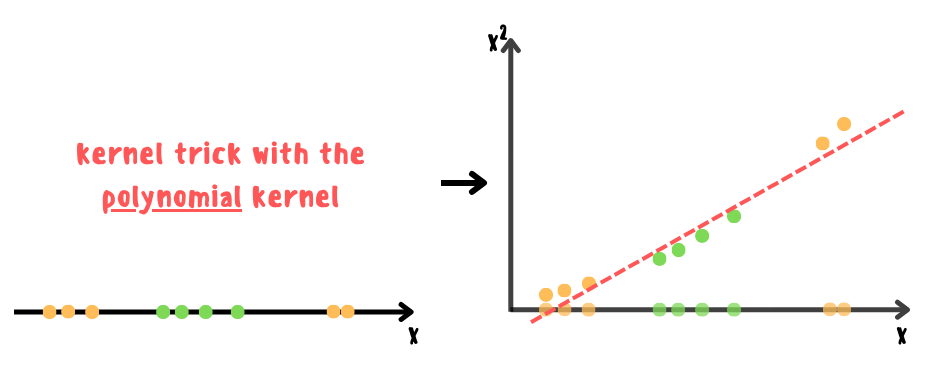

Функция, с помощью которой выполняется ядерный трюк, то есть определяется сходство между парами точек данных в исходном пространстве, называется ядром. В scikit-learn поддерживаются следующие ядра:

- линейное — просто вычисляет скалярное произведение векторов в исходном пространстве, что эквивалентно обычному линейному классификатору:

$$a^T \cdot b$$

- полиномиальное — способно улавливать более сложные зависимости между данными, создавая оптимальную разделяющую гиперплоскость в новом пространстве, однако требуется тщательный подбор параметров:

$$(\gamma a^T \cdot b + r)^d$$

- гауссовское RBF ([радиально-базисная функция](https://en.wikipedia.org/wiki/Radial_basis_function)) — хорошо подходит для случаев, когда отношение в данных имеет сложную нелинейную форму и менее подвержено переобучению, поскольку учитывает не только значения признаков, но и их распределение:

$$exp(-\gamma||a - b||^2)$$

- сигмоидальное — применяет гиперболический тангенс к линейной комбинации векторов, имитируя использование двухслойной нейронной сети с сигмоидальной функцией активации, что также позволяет хорошо работать со сложными нелинейными случаями, однако это может привести к переобучению в случае появления шума и выбросов:

$$tanh(\gamma a^t \cdot b + r)$$

В данном случае $\gamma$ — параметр, определяющий степень влияния между обучающими образцами: чем ниже данное значение, тем больше радиус влияния образцов на формирование решающей границы, что делает её более гладкой. Между тем коэффициент сдвига $r$ (coef0 в scikit-learn) влияет на гибкость ядра, что позволяет создавать более сложные решающие границы.

Стоит также добавить, что ядерный трюк может применяться не только в контексте SVM, но и к другим алгоритмам — просто так исторически сложилось, что ядерный трюк ассоциируется именно с SVM.

**В случае нелинейной регрессии** SVM также пытается сделать данные линейно разделимыми в пространстве более высокой размерности, но только для поиска оптимальной гиперплоскости, которая будет минимизировать расстояние между зазором и образцами как и в линейном случае.

В scikit-learn для работы с нелинейными случаями используются классы SVR и SVC на основе библиотеки Libsvm, в которой реализован алгоритм с поддержкой ядерного трюка и l2-регуляризацией, контролируемой параметром C.

### **Реализация на Python с нуля**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.utils import check_random_state, check_array
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR, _libsvm
from sklearn.datasets import load_iris, load_diabetes

**Linear SVM**

In [ ]:
class LinearSVM:
    def __init__(self, regression=False, C=1.0, eps=0, learning_rate=0.001, max_iter=1000,
                 random_state=0):
        self.regression = regression
        self.C = C
        self.eps = eps
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X, y):
        if self.regression:
            self.bias, self.weights = self._find_weights(X, y)
        else:
            classes = np.unique(y)
            n_classes = len(classes)
            _, n_features = X.shape

            self.bias = np.zeros(n_classes)
            self.weights = np.zeros((n_classes, n_features))
            np.random.seed(self.random_state)

            for i, cls in enumerate(classes):
                y_binary = np.where(y == cls, 1, -1)
                self.bias[i], self.weights[i] = self._find_weights(X, y_binary)

    def _find_weights(self, X, y):
        n_samples, n_features = X.shape
        bias = 0
        weights = np.zeros(n_features) if self.regression else np.random.randn(n_features)

        for _ in range(self.max_iter):
            for i in range(n_samples):
                y_pred = X[i] @ weights + bias
                margin = y[i] - y_pred if self.regression else y[i] * y_pred
                condition = np.abs(margin) > self.eps if self.regression else margin < 1

                if condition:
                    if self.regression:
                        db = -self.C * (margin - self.eps)
                        dw = -self.C * (margin - self.eps) * X[i]
                    else:
                        db = -self.C * y[i]
                        dw = -self.C * y[i] * X[i]

                    bias -= self.learning_rate * db
                    weights -= self.learning_rate * dw

        return bias, weights

    def predict(self, X):
        scores = X @ self.weights.T + self.bias

        return scores if self.regression else np.argmax(scores, axis=1)

**Kernel SVM на основе Libsvm**

In [ ]:
class SVM:
    def __init__(self, regression=False, C=1.0, kernel='rbf', degree=3, solver='auto',
                 gamma='scale', epsilon=0.1, coef0=0.0, shrinking=True, probability=False,
                 tol=0.001, cache_size=200, max_iter=-1, random_state=None):
        self.regression = regression
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.solver = solver
        self.gamma = gamma
        self.epsilon = epsilon
        self.coef0 = coef0
        self.shrinking = shrinking
        self.probability = probability
        self.tol = tol
        self.cache_size = cache_size
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X, y):
        X = X.astype(np.float64)
        y = y.astype(np.float64)

        rnd = check_random_state(self.random_state)
        seed = rnd.randint(np.iinfo('i').max)

        if self.gamma == 'scale':
            self.gamma = 1.0 / (X.shape[1] * X.var()) if X.var() != 0 else 1.0
        elif self.gamma == 'auto':
                self.gamma = 1.0 / X.shape[1]
        else:
            self.gamma = self.gamma

        if self.solver == 'auto':
            self.solver = 'epsilon_svr' if self.regression else 'c_svc'

        libsvm_impl = ['c_svc', 'nu_svc', 'one_class', 'epsilon_svr', 'nu_svr']
        self.solver = libsvm_impl.index(self.solver)

        (self.support_, self.support_vectors_, self._n_support, self.dual_coef_, self.intercept_,
         self._probA, self._probB, self.fit_status_, self._num_iter

        ) = _libsvm.fit(X, y, C=self.C, svm_type=self.solver, kernel=self.kernel, gamma=self.gamma,
                        degree=self.degree, epsilon=self.epsilon, coef0=self.coef0, tol=self.tol,
                        shrinking=self.shrinking, probability=self.probability,
                        cache_size=self.cache_size, max_iter=self.max_iter, random_seed=seed
                        )

    def predict(self, X_test):
        X_test = X_test.astype(np.float64)
        prediction = _libsvm.predict(X_test, self.support_, self.support_vectors_, self._n_support,
                                     self.dual_coef_, self.intercept_, self._probA, self._probB,
                                     svm_type=self.solver, kernel=self.kernel, degree=self.degree,
                                     coef0=self.coef0, gamma=self.gamma, cache_size=self.cache_size
                                     )

        return prediction if self.regression else prediction.astype(int)

In [ ]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

### **Загрузка датасетов**

In [ ]:
X1, y1 = load_iris(return_X_y=True, as_frame=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values, y1.values, random_state=0)
print(X1, y1, sep='\n')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [ ]:
X2, y2 = load_diabetes(return_X_y=True, as_frame=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2.values, y2.values, random_state=0)
print(X2, y2, sep='\n')

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

### **Обучение моделей и оценка полученных результатов**
В случае классификации SVC справился лучше LinearSVC, сделав более гибкие границы разделения классов. Как можно заметить, решающие границы SVC получились гибкими, поскольку линейная граница решений в многомерном пространстве признаков будет соответствовать сложной нелинейной границе в исходном пространстве.  

Однако такой подход не всегда работает лучше, что видно на примере регрессии: часто в данных с простой зависимостью линейное ядро демонстрирует лучшие результаты.

**LinearSVC**

In [ ]:
linear_svc = LinearSVM(random_state=0)
linear_svc.fit(X1_train, y1_train)
linear_svc_pred_res = linear_svc.predict(X1_test)
linear_svc_accuracy = accuracy_score(y1_test, linear_svc_pred_res)

print(f'LinearSVC accuracy: {linear_svc_accuracy:}')
print(linear_svc_pred_res)

LinearSVC accuracy: 0.9210526315789473
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 2 0 0 2 0 0 1 1 0 2 2 0 2 2 1 0
 2]


**LinearSVC (scikit-learn)**

sk LinearSVC accuracy: 0.9210526315789473
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 2 0 0 2 0 0 1 1 0 2 2 0 2 2 1 0
 2]


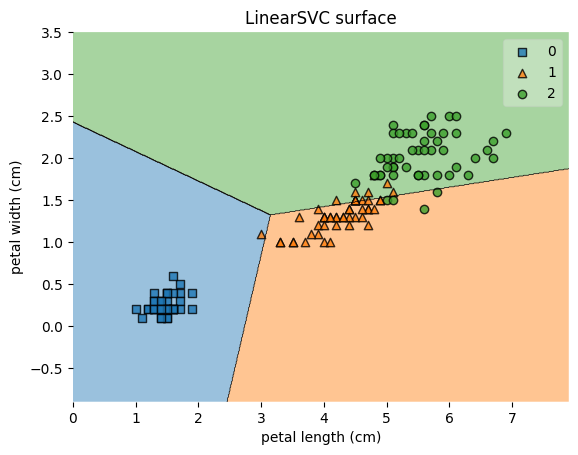

In [ ]:
sk_linear_svc = LinearSVC(loss='squared_hinge', max_iter=10000, random_state=0)
sk_linear_svc.fit(X1_train, y1_train)
sk_linear_svc_pred_res = sk_linear_svc.predict(X1_test)
sk_linear_svc_accuracy = accuracy_score(y1_test, sk_linear_svc_pred_res)

print(f'sk LinearSVC accuracy: {sk_linear_svc_accuracy:}')
print(sk_linear_svc_pred_res)

feature_indexes = [2, 3]
title1 = 'LinearSVC surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_linear_svc, feature_indexes, title1)

**SVC**

In [ ]:
svc = SVM(random_state=0, gamma='auto')
svc.fit(X1_train, y1_train)
svc_pred_res = svc.predict(X1_test)
svc_accuracy = accuracy_score(y1_test, svc_pred_res)

print(f'SVC accuracy: {svc_accuracy:}')
print(svc_pred_res)

SVC accuracy: 0.9736842105263158
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


**SVC (scikit-learn)**

sk SVC accuracy: 0.9736842105263158
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


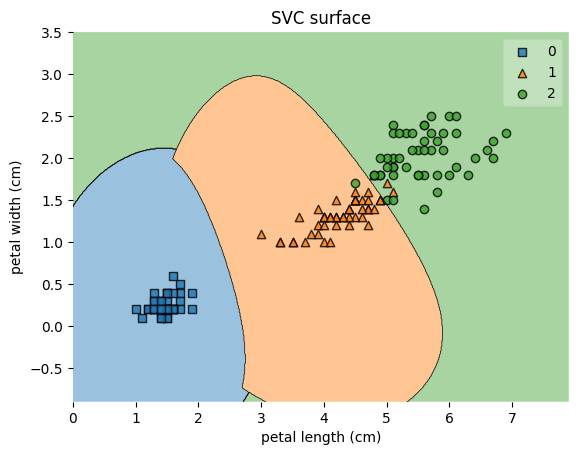

In [ ]:
sk_svc = SVC(random_state=0, gamma='auto')
sk_svc.fit(X1_train, y1_train)
sk_svc_pred_res = sk_svc.predict(X1_test)
sk_svc_accuracy = accuracy_score(y1_test, sk_svc_pred_res)

print(f'sk SVC accuracy: {sk_svc_accuracy:}')
print(sk_svc_pred_res)

feature_indexes = [2, 3]
title2 = 'SVC surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_svc, feature_indexes, title2)

**LinearSVR**

In [ ]:
linear_svr = LinearSVM(regression=True)
linear_svr.fit(X2_train, y2_train)
linear_svr_pred_res = linear_svr.predict(X2_test)
linear_svr_r2 = r2_score(y2_test, linear_svr_pred_res)

print(f'LinearSVR r2 score: {linear_svr_r2:}')
print(linear_svr_pred_res)

LinearSVR r2 score: 0.3792357370266678
[216.15968628 220.4481875  165.81989913 123.24660088 162.79339624
 219.32628582 114.40328867 187.29239041 135.60608051 192.94216428
 142.8356438  186.26887666 115.93676843  92.65131502 237.37770913
 105.70347983 140.17045763  78.03390184  93.19336622 213.55077346
 172.96582698 141.23351563 160.93321605 136.06861865 189.99746346
 162.00412166 119.88834206  95.16558303 169.4791898  167.9510029
 178.92773537  94.54901318 131.32930116 143.22717983 158.62314035
 179.63207827 161.26232493 184.99305841 137.0911429  190.80874425
  97.79122811 174.20746847 149.93081547 163.6511185  186.25250505
  89.10531469 134.71035596 137.85610675 143.47793077 213.7920584
 154.13931085  96.48578013 152.68919476 164.92850238 204.49516212
 184.36868908 186.98158124 104.04646649 155.49588864 175.27621381
 180.18811448 150.78618876 162.95426399 136.68414224 221.99330585
 141.62183394  91.8349318  225.76370605 194.54965172  69.11345544
  92.30405285 151.11667643 118.33817248

**LinearSVR (scikit-learn)**

In [ ]:
sk_linear_svr = LinearSVR(loss='squared_epsilon_insensitive')
sk_linear_svr.fit(X2_train, y2_train)
sk_linear_svr_pred_res = sk_linear_svr.predict(X2_test)
sk_linear_svr_r2 = r2_score(y2_test, sk_linear_svr_pred_res)

print(f'sk LinearSVR R2 score: {sk_linear_svr_r2:}')
print(sk_linear_svr_pred_res)

sk LinearSVR R2 score: 0.37814542044497423
[215.54802943 220.69479521 163.72321514 125.35050039 168.23663006
 222.87285934 117.76887939 183.439543   143.23792374 199.25861483
 149.2464745  180.13546176 117.73284104  98.8129158  229.40677283
 107.70075384 144.10708869  83.42833432 101.75722386 207.55264272
 177.38566123 146.60127268 159.10274119 144.47851976 188.12741871
 161.72800999 122.19555137  98.38934168 172.04469244 163.88747259
 174.31869231  98.56101933 137.43514957 143.99818253 152.57005935
 180.16575707 160.23942338 181.13802512 137.10299603 190.01855923
  99.30200726 168.53506831 147.88091211 166.46196854 180.1601789
  91.81189072 137.23909085 140.51020744 137.65220301 212.07954464
 154.84803714  97.88215713 154.47755522 160.16521948 206.99600783
 176.91673261 183.28777653 113.64466494 148.4110365  170.98296686
 185.33374519 155.94941503 161.03649538 131.05262642 225.54785872
 145.68037375  95.41892062 217.82197857 191.37652659  70.60017863
  96.29414312 144.83768093 117.209

**SVR**

In [ ]:
svr = SVM(regression=True)
svr.fit(X2_train, y2_train)
svr_pred_res = svr.predict(X2_test)
svc_r2 = r2_score(y2_test, svr_pred_res)

print(f'SVR r2 score: {svc_r2:}')
print(svr_pred_res)

SVR r2 score: 0.13842687260455933
[156.05494339 160.2561796  141.5352585  126.32530705 138.56287083
 157.79461531 118.30051225 153.1126463  133.32684359 151.34517091
 138.31021981 150.93156042 127.62035887 125.65861919 159.80948036
 119.27243753 132.8868118  115.3503535  130.26443966 154.69113982
 140.44764244 131.1864082  140.91091129 132.34658014 147.43835547
 141.71095095 135.93497953 120.372006   141.90918325 145.01581208
 147.05308508 115.34872572 128.98260578 139.39763958 141.37219221
 149.93533907 144.21593809 147.00705167 128.79733929 154.94745068
 122.27967665 145.73099063 138.72486465 142.87524309 149.4272714
 119.3023132  129.77336124 128.95425751 135.62538778 154.4679459
 137.44976849 114.591969   136.28102471 144.85720422 155.6502593
 145.13807371 149.33504099 124.03772077 141.352508   147.84699051
 148.25434815 133.39538615 143.03923607 131.48119845 154.73175072
 132.94449565 118.51262122 149.10562494 147.22897373 130.57831287
 116.89776562 139.90942034 125.511231   129.6

**SVR (scikit-learn)**

In [ ]:
sk_svr = SVR()
sk_svr.fit(X2_train, y2_train)
sk_svr_pred_res = sk_svr.predict(X2_test)
sk_svr_r2 = r2_score(y2_test, sk_svr_pred_res)

print(f'sk SVR r2 score: {sk_svr_r2:}')
print(sk_svr_pred_res)

sk SVR r2 score: 0.13842687260455933
[156.05494339 160.2561796  141.5352585  126.32530705 138.56287083
 157.79461531 118.30051225 153.1126463  133.32684359 151.34517091
 138.31021981 150.93156042 127.62035887 125.65861919 159.80948036
 119.27243753 132.8868118  115.3503535  130.26443966 154.69113982
 140.44764244 131.1864082  140.91091129 132.34658014 147.43835547
 141.71095095 135.93497953 120.372006   141.90918325 145.01581208
 147.05308508 115.34872572 128.98260578 139.39763958 141.37219221
 149.93533907 144.21593809 147.00705167 128.79733929 154.94745068
 122.27967665 145.73099063 138.72486465 142.87524309 149.4272714
 119.3023132  129.77336124 128.95425751 135.62538778 154.4679459
 137.44976849 114.591969   136.28102471 144.85720422 155.6502593
 145.13807371 149.33504099 124.03772077 141.352508   147.84699051
 148.25434815 133.39538615 143.03923607 131.48119845 154.73175072
 132.94449565 118.51262122 149.10562494 147.22897373 130.57831287
 116.89776562 139.90942034 125.511231   12

### **Преимущества и недостатки метода опорных векторов**

Преимущества:
- высокая точность прогнозов;
- может быть адаптирован к обнаружению аномалий в данных;
- возможность обработки многомерных данных без их предварительного преобразования или понижения размерности.

Недостатки:
- низкая скорость работы на данных большого размера;
- из-за разделения данных на гиперплоскости может возникнуть чувствительность к шуму или нестабильная работа с сильно перекрывающимися классами в данных.


### **Дополнительные источники**
Статьи:
- «Statistical performance of Support Vector Machines», Gilles Blanchard, Olivier Bousquet and Pascal Massart;
- «A review of optimization methodologies in Support Vector Machines», John Shawe-Taylor, Shiliang Sun;
- «On the Algorithmic Implementation of Multiclass Kernel-based Vector Machines», Koby Crammer, Yoram Singer;
- «LIBLINEAR: A library for large linear classification», Rong-En Fan, Kai-Wei Chang, Cho-Jui Hsieh, Xiang-Rui Wang, Chih-Jen Lin;
- «LIBSVM: A Library for Support Vector Machines», Chih-Chung Chang and Chih-Jen Lin.

Документация:
- [Описание методов SVM](https://scikit-learn.org/stable/modules/svm.html#);
- [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html);
- [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html);
- [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html);
- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

Видео: [один](https://www.youtube.com/watch?v=_PwhiWxHK8o), [два](https://www.youtube.com/watch?v=V7mUNS3qXVY), [три](https://www.youtube.com/watch?v=0OLR3If-qS0), [четыре](https://www.youtube.com/watch?v=jMWjN6mJiSw), [пять](https://www.youtube.com/watch?v=EESZtSOdhEQ), [шесть](https://www.youtube.com/watch?v=FrsIHCr4TZE), [семь](https://www.youtube.com/watch?v=efR1C6CvhmE), [весемь](https://www.youtube.com/watch?v=Toet3EiSFcM), [девять](https://www.youtube.com/watch?v=Qc5IyLW_hns), [десять](https://www.youtube.com/watch?v=8xbnLHn4jjQ), [одиннадцать](https://www.youtube.com/watch?v=rB-iRIpAPKo).
